In [ ]:
# from https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

# ------------- IPython Magic Commands --------------
%lsmagic

%debug



In [75]:
a=[1, 3 ,2]
b = 2
c=a+[b]
print(c)


[1, 3, 2, 2]


We'll start off by importing the main PyTorch package along with the *Variable* class used to store our data tensors and the *nn* package which we will use when building the model. In addition, we'll only be using numpy to pre-process our data as Torch works really well with numpy.

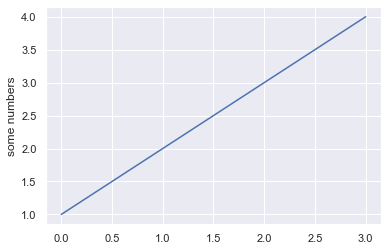

In [35]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [125]:
#https://datatofish.com/confusion-matrix-python/

import pandas as pd
#from pandas_ml import ConfusionMatrix

data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

print(len(data['y_Actual']), len(data['y_Predicted']))

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df.head())

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
confusion_matrix.style

12 12
   y_Actual  y_Predicted
0         1            1
1         0            1
2         0            0
3         1            1
4         0            0
Predicted  0  1
Actual         
0          5  2
1          1  4


Predicted,0,1
Actual,,
0,5,2
1,1,4


In [ ]:
# google finance / 30 August 2020
# pip install googlefinance
# https://pypi.org/project/googlefinance/
#import json
#from googlefinance import getQuotes

#A= getQuotes('AAPL')




In [53]:
# https://aroussi.com/post/python-yahoo-finance
# pip install yfinance --upgrade --no-cache-dir
# https://github.com/ranaroussi/yfinance

#=====
# https://learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/


# Dow Jones Industrial Average (^DJI)
# FTSE 100 (^FTSE)
# DAX PERFORMANCE-INDEX (^GDAXI)
# CAC 40 (^FCHI)
# Nikkei 225 (^N225)
# SSE Composite Index (000001.SS)

import yfinance as yf

if False:
    ftse = yf.Ticker("^FTSE")
    ftse_hist = ftse.history(period="max")
    print(type(ftse_hist))
    ftse_hist.head

#
data = yf.download("^DJI ^FTSE ^GDAXI ^FCHI ^N225 000001.SS", start="2020-01-01", end="2020-08-30")
print(type(data))

#msft = yf.Ticker("MSFT")
#print(type(msft))

# get stock info
#msft.info

# get historical market data
#hist = msft.history(period="max")
#print(type(hist))
#hist.head

<class 'pandas.core.frame.DataFrame'>
[*********************100%***********************]  6 of 6 completed
<class 'pandas.core.frame.DataFrame'>


In [72]:
#print(data.head)

# To access the closing price data for SPY, you should use: data['SPY']['Close']
for a in data['Close']:
    b = data['Close'][a].to_frame()
    b['20d'] = b[a].rolling(window=5).mean()
    print(b[-20:])
    for idx in reversed(b.index):
        print(idx, type(idx))
        break
    
    #b['w20'] = a
#    data[a]['Close']
    break
    
#print(data['Close']['^DJI'])
    

              000001.SS          20d
Date                                
2020-08-03  3367.966064  3297.461426
2020-08-04  3371.689941  3326.207422
2020-08-05  3377.560059  3342.809033
2020-08-06  3386.459961  3362.736621
2020-08-07  3354.034912  3371.542188
2020-08-10  3379.251953  3373.799365
2020-08-11  3340.290039  3367.519385
2020-08-12  3319.266113  3355.860596
2020-08-13  3320.726074  3342.713818
2020-08-14  3360.099121  3343.926660
2020-08-17  3438.801025  3355.836475
2020-08-18  3451.089111  3377.996289
2020-08-19  3408.128906  3395.768848
2020-08-20  3363.898926  3404.403418
2020-08-21  3380.683105  3408.520215
2020-08-24  3385.637939  3397.887598
2020-08-25  3373.577881  3382.385352
2020-08-26  3329.739014  3366.707373
2020-08-27  3350.110107  3363.949609
2020-08-28  3403.806885  3368.574365
2020-08-28 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


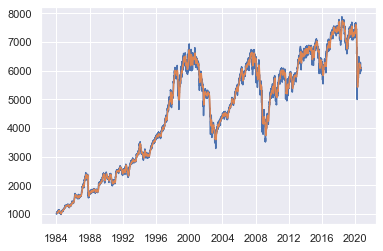

In [39]:
plt.plot(ftse_hist['Close'])
plt.plot(ftse_hist['Close'].rolling(window=20).mean())
plt.show()

# Learn
source https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89

In [273]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Confusion Matrix
###################### OUTPUT ######################
array([[23,  8],
       [12, 60]])

#Classification Report

print(classification_report(y_test, y_pred_list))

###################### OUTPUT ######################
precision    recall  f1-score   support
           0       0.66      0.74      0.70        31
           1       0.88      0.83      0.86        72
    accuracy                           0.81       103
   macro avg       0.77      0.79      0.78       103
weighted avg       0.81      0.81      0.81       103

ModuleNotFoundError: No module named 'sklearn'

In [1]:
# https://pytorch.org/get-started/locally/#mac-anaconda
# conda install pytorch torchvision cudatoolkit=10.2 -c pytorch
import torch
from torch import nn
import numpy as np
import datetime

# Create dammy train test set

create to typ of x^3 data sets predicting the next 2 point

[0.23309093 0.45164794 0.05867559 0.48031216]
[ 0.46153371 -0.15806776 -0.22464431  3.21391268]
[ 1.98233027  0.42121132 -1.81317508 -2.03645184]
[-0.79195265 -0.70955964 -2.82003918  0.28133835]
[[ 0.          0.1         0.3         0.5       ]
 [ 0.5        -0.2        -0.2         3.        ]
 [ 2.          0.3        -1.5        -2.        ]
 ...
 [ 0.37721847 -0.19278121  0.08896957  2.58344273]
 [ 2.04513343  0.19070594 -1.10348105 -2.29168139]
 [-0.64605173 -0.40244924 -2.68544393  0.20519928]]
[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0

C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


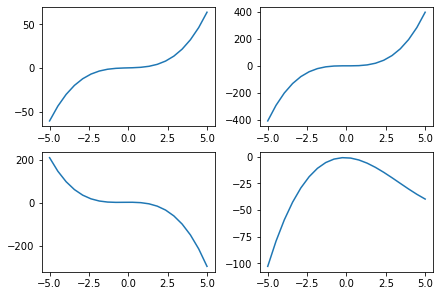

In [96]:
#import pandas as pd
import glob, os
import pprint
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def func(x, a, b, c, d):
    ''' ~x^3 curve     '''
    return a + b * x + c * x * x + d * pow(x,3)


Pos = [ [0, 0.1 , 0.3, 0.5],
        [0.5, -0.2 , -0.2, 3],
       [2, 0.3, -1.5, -2],
       [-0.5, -0.7, -3, 0.1]]

out = [1 ,1 , 0 , 0]
   
npPos = np.array(Pos)
npOut = np.array(out)

noise = np.random.normal(size=(4,4)) / 5
npPos1 = npPos+noise

#https://matplotlib.org/gallery/subplots_axes_and_figures/demo_constrained_layout.html#sphx-glr-gallery-subplots-axes-and-figures-demo-constrained-layout-py
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
xData = np.linspace(-5, 5, 20)
for V, ax in zip(npPos1, f1_axes.flat):
    print(V)
    yData = func(xData, *V)
    ax.plot(xData, yData)
    #ax.set_xlabel(str(V))
fig1.show()


XtrainData = npPos
YtrainData = npOut
for ii in range(100):
    noise = np.random.normal(size=(4,4)) / 5
    npPos1 = npPos+noise
    XtrainData = np.concatenate((XtrainData, npPos1), axis=0)
    YtrainData = np.concatenate((YtrainData, npOut ), axis=0)
    
print(XtrainData)
print(YtrainData)

    


In [170]:
from scipy import stats
trainStat = stats.describe(XtrainData)
print(trainStat)
print(trainStat.mean)
normalizedTrain = (XtrainData - trainStat.mean) / np.sqrt(trainStat.variance)
stats.describe(normalizedTrain)

print(type(XtrainData))

DescribeResult(nobs=404, minmax=(array([-0.97260027, -1.22371437, -3.43682258, -2.4760504 ]), array([2.43043601, 0.82227406, 0.80832865, 3.44876933])), mean=array([ 0.50638901, -0.12127   , -1.09099845,  0.39223615]), variance=array([0.93116924, 0.17126754, 1.64759804, 3.18037375]), skewness=array([ 0.64149874, -0.32503349, -0.40527708,  0.16540964]), kurtosis=array([-0.94009782, -0.57536076, -1.29824994, -0.98818048]))
[ 0.50638901 -0.12127    -1.09099845  0.39223615]
<class 'numpy.ndarray'>


In [10]:
from scipy import stats

class dataNormalization:
    ''' Data normalization class'''
    def __init__(self, data):
        self.initialized = False
        if not type(data) is np.ndarray:
            raise ValueError('dataNormalization required numpy array for initialization')
        self.dataStat = stats.describe(data)
        self.initialized = True

    def normalize(self, data):
        return (data - self.dataStat.mean) / np.sqrt(self.dataStat.variance)

In [11]:
dNorm = dataNormalization(XtrainData)
stats.describe(dNorm.normalize(XtrainData))


DescribeResult(nobs=111, minmax=(array([-1.16199716, -1.07496484, -1.07740654, -1.03376257, -0.96967635,
       -0.97457294, -1.07431851, -1.06731467, -4.97847921, -4.38087788,
       -2.99715475]), array([4.57249159, 4.12055953, 3.95491047, 4.86507348, 5.23838866,
       4.97839842, 3.53414695, 4.14716673, 2.35705204, 1.52000559,
       3.95753523])), mean=array([ 6.14123367e-16,  3.78075949e-16,  5.09102270e-16,  5.17103877e-16,
       -8.00160738e-18, -1.22024513e-16, -6.60132609e-16,  6.52131002e-16,
        3.15063291e-17,  8.42669278e-17,  1.13366523e-16]), variance=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), skewness=array([ 1.75898415,  1.8791425 ,  1.80646565,  2.17586148,  2.42820172,
        2.3257104 ,  1.71644796,  1.96629504, -1.39608577, -1.79308595,
        0.73548092]), kurtosis=array([4.29043447, 4.36595382, 3.67390382, 5.85934911, 7.53238429,
       6.57546331, 2.74370007, 4.37466945, 5.55490904, 5.03146094,
       2.65837196]))

In [53]:
runAllCells = False

# Load Real data

Data created by Predict.py into 2 files
20200824_Train.csv : trainin data
20200824_Eval.csv  : eval data containes last week data
last column is the classification 
1: Not getting worst
0: getting worst by more than 10% or into negative territory


In [2]:
PATH = "C:\\Users\\tzurv\\python\\VScode\\scraper\\"
dateStamp = "20200824"
TrainFileName = PATH + dateStamp + "_Train.csv"
EvalFileName  = PATH + dateStamp + "_Eval.csv"


allTrainingData =  np.genfromtxt(TrainFileName, delimiter=',') 
print(allTrainingData[0:5,:])
#print(allTrainingData.shape)
XtrainData = allTrainingData[:,0:-1]
#print(XtrainData[0:5,:])
print(XtrainData.shape)

YtrainData = allTrainingData[:,-1]
print(YtrainData.shape)
#print(YtrainData[0:5])


allEvalData =  np.genfromtxt(EvalFileName, delimiter=',') 
print(allEvalData[0:5,:])
XEvalData = allEvalData[:,0:-1]
#print(XtrainData[0:5,:])
print(XEvalData.shape)

YEvalData = allEvalData[:,-1]
print(YEvalData.shape)
#print(YtrainData[0:5])



[[ 1.16792423e+01  1.03812891e+01  7.39674330e+00  6.55524495e+00
   6.97537355e+00  6.97537355e+00  6.13635506e+00  7.07420043e+00
  -5.18620103e-01  2.35007813e-01 -4.76556096e-02  0.00000000e+00]
 [ 1.97089821e+01  1.16792423e+01  1.03812891e+01  7.39674330e+00
   6.55524495e+00  6.97537355e+00  6.97537355e+00  7.42816873e+00
  -1.01956495e+00  6.31252418e-01 -1.16769330e-01  0.00000000e+00]
 [ 7.81935663e+00  1.97089821e+01  1.16792423e+01  1.03812891e+01
   7.39674330e+00  6.55524495e+00  6.97537355e+00  1.12537218e+01
  -4.40919724e+00 -2.94993595e-01  4.60895919e-01  1.00000000e+00]
 [ 1.60962563e+00  7.81935663e+00  1.97089821e+01  1.16792423e+01
   1.03812891e+01  7.39674330e+00  6.55524495e+00  1.38864229e+01
  -2.69097189e+00 -1.14480274e+00  4.08220160e-01  1.00000000e+00]
 [ 7.18786551e+01  5.23548331e+01  4.85512442e+01  3.70594684e+01
   3.75668606e+01  3.50439223e+01  4.16768859e+01  3.86290520e+01
  -4.49399344e+00  1.91887520e+00 -5.29576337e-02  1.00000000e+00]]
(111

# Analyze Data
https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32

https://www.investopedia.com/terms/v/variance-inflation-factor.asp
KEY TAKEAWAYS
A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
Detecting multicollinearity is important because while it does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 
A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

=> A VIF of 1 indicates two variables are not correlated, a VIF between 1 and 5 indicates moderate correlation, and a VIF above 5 indicates high correlation.

In [3]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools


Bad key "text.kerning_factor" on line 4 in
C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [367]:
a = [x for x in range(12)]
print(a)
b = list(itertools.combinations(a,3))
#for c in itertools.combinations(a,3):
#    print(c, type(c))
print(type(b[0]))
print(np.asarray(b[0]))
col_idx = np.array([0, 1,  5])
print(col_idx)
print(XtrainData.shape)
print(XtrainData[0:2,:])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
<class 'tuple'>
[0 1 2]
[0 1 5]
(111, 11)
[[11.67924227 10.38128906  7.3967433   6.55524495  6.97537355  6.97537355
   6.13635506  7.07420043 -0.5186201   0.23500781 -0.04765561]
 [19.70898215 11.67924227 10.38128906  7.3967433   6.55524495  6.97537355
   6.97537355  7.42816873 -1.01956495  0.63125242 -0.11676933]]


In [4]:

#   features  vif_Factor
#0         0    5.707559
#1         6    8.919330
#2         9    2.367532
#3        10    1.254274

#   features  vif_Factor
#0         2   13.268186
#1         3   19.280179
#2         6   12.150270
#3         9    2.483262
#4        10    1.287977

indxs = [x for x in range(11)]
for L in range(3,7):
    print(f" --------------- {L} ------------")
    for c in itertools.combinations(indxs,L):
        #print(c)
        col_idx = np.asarray(c)
        partTrainData = XtrainData[:,col_idx]
        #print(partTrainData.shape[1])
        pdTrain = pd.DataFrame(data=partTrainData, columns=[str(x) for x in range(partTrainData.shape[1])])
        #print(pdTrain)

        #print(pdTrain.corr())
        # https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/pcolor_demo.html
        #c = plt.pcolor(pdTrain.corr())
        #plt.colorbar(c)


        #X=pdTrain.drop(["11"], axis=1)
        X=pdTrain
        vif = pd.DataFrame()
        vif["features"] = col_idx
        vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    
        if sum(vif["vif_Factor"]<20) == L:
            print(vif)
        
    


 --------------- 3 ------------
   features  vif_Factor
0         0    9.711988
1         1    7.420000
2         2    9.400578
   features  vif_Factor
0         0    6.723972
1         1   10.261250
2         3    8.109233
   features  vif_Factor
0         0    6.684981
1         1    7.786339
2         4    4.551736
   features  vif_Factor
0         0    7.454641
1         1    6.940209
2         5    4.642343
   features  vif_Factor
0         0    6.566093
1         1    9.862382
2         6    6.991178
   features  vif_Factor
0         0    7.045066
1         1   10.094932
2         7    8.930736
   features  vif_Factor
0         0    6.684604
1         1   11.488979
2         8    3.880719
   features  vif_Factor
0         0    6.689943
1         1    7.978893
2         9    1.565421
   features  vif_Factor
0         0   11.877004
1         1   17.404261
2        10    3.264714
   features  vif_Factor
0         0    7.894716
1         2   17.757575
2         3   11.076755
   featu

2         9    2.341560
   features  vif_Factor
0         5    2.618325
1         8    1.368894
2         9    2.122701
   features  vif_Factor
0         5    1.660699
1         8    7.252868
2        10    5.838665
   features  vif_Factor
0         5    2.105080
1         9    2.137532
2        10    1.109679
   features  vif_Factor
0         6   16.616834
1         7   17.860126
2         8    1.802431
   features  vif_Factor
0         6   16.603295
1         7   16.628303
2        10    1.258219
   features  vif_Factor
0         6    2.979838
1         8    1.773175
2         9    1.947355
   features  vif_Factor
0         6    1.860466
1         8    7.032302
2        10    5.272684
   features  vif_Factor
0         6    2.087162
1         9    1.834243
2        10    1.252268
   features  vif_Factor
0         7    4.741224
1         8    2.218688
2         9    2.882748
   features  vif_Factor
0         7    2.159442
1         8    8.150115
2        10    5.693973
   features  vif

   features  vif_Factor
0         4    7.416182
1         8   13.349880
2         9    5.053234
3        10   10.224551
   features  vif_Factor
0         5    5.282486
1         8   11.905584
2         9    3.508759
3        10    9.651132
   features  vif_Factor
0         6    4.088429
1         8    9.293544
2         9    2.424045
3        10    6.563375
 --------------- 5 ------------
   features  vif_Factor
0         0    8.769459
1         2   19.959290
2         3   15.024638
3         6   12.057428
4         8    2.167075
   features  vif_Factor
0         0    7.985039
1         2   19.996020
2         3   14.941421
3         6   11.864287
4        10    1.292683
   features  vif_Factor
0         1   15.539462
1         2   17.832769
2         3   17.824769
3         5   19.481724
4        10    3.670885
   features  vif_Factor
0         1   16.456494
1         2   13.575817
2         3   17.105496
3         6   13.369923
4        10    2.459176
   features  vif_Factor
0       

C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\tzurv\.conda\envs\Scraper\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Since we're done with all the data pre-processing, we can now move the data from numpy arrays to PyTorch's very own data structure - **Torch Tensors**

In [15]:
#   features  vif_Factor
#0         2    9.407999
#1         6    9.157694
#2         9    1.922209
#3        10    1.257232
#col_idx = np.array([2, 6, 9, 10])
#Predicted	0.0	1.0
#Actual		
#0.0	22	24
#1.0	7	58
#21.63

#   features  vif_Factor
#0         2   14.443068
#1         6   10.469150
#2         8   11.313671
#3        10    7.455475
col_idx = np.array([2, 6, 8, 10])

#Predicted	0.0	1.0
#Actual		
#0.0	24	22
#1.0	7	58
# 21.88


#col_idx = np.array([2, 3, 6, 8, 10])
partTrainData = XtrainData[:,col_idx]
input_seq = torch.from_numpy(partTrainData)
target_seq = torch.Tensor(YtrainData)

In [16]:
print(input_seq.shape, input_seq.shape[0])
print(target_seq.shape)

torch.Size([111, 4]) 111
torch.Size([111])


Now we've reached the fun part of this project! We'll be defining the model using the Torch library, and this is where you can add or remove layers, be it fully connected layers, convolutational layers, vanilla RNN layers, LSTM layers, and many more! In this post, we'll be using the basic nn.rnn to demonstrate a simple example of how RNNs can be used.

Before we start building the model, let's use a build in feature in PyTorch to check the device we're running on (CPU or GPU). This implementation will not require GPU as the training is really simple. However, as you progress on to large datasets and models with millions of trainable parameters, using the GPU will be very important to speed up your training.

In [7]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [8]:
dateNow = datetime.datetime.now()
print(dateNow)

2020-08-27 17:09:36.486974


In [376]:
# Random data

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 10, 10, 1

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [17]:
# Normalize data
dNorm = dataNormalization(partTrainData)
normXtrainData = dNorm.normalize(partTrainData)

# change numpy representation to float and conver to pytorch tensor
x = torch.from_numpy(normXtrainData.astype(np.float32))
y = torch.from_numpy(YtrainData.astype(np.float32))
# add a Dimension
y = y.unsqueeze(1)

print(x.shape, y.shape)

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = x.shape[0], x.shape[1], 20, 1
print(f"N={N}, D_in={D_in}, H={H}, D_out={D_out}")


torch.Size([111, 4]) torch.Size([111, 1])
N=111, D_in=4, H=20, D_out=1


logisticregression
https://medium.com/biaslyai/pytorch-linear-and-logistic-regression-models-5c5f0da2cb9

In [20]:
# source: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-custom-nn-modules

# -*- coding: utf-8 -*-
import torch


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu1 = self.linear1(x)
        h_relu2 = self.linear2(h_relu1)
        y_pred  = self.linear3(h_relu2)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
#N, D_in, H, D_out = 64, 10, 10, 1

# Create random Tensors to hold inputs and outputs
#x = torch.randn(N, D_in)
#y = torch.randn(N, D_out)

# move to device 
x = x.to(device)
y = y.to(device) 

print(f"input dim {x.shape}")
print(f"Input {x[0,:]} -> output {y[0]}")

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)
model = model.to(device)


#print the model
print(model)
modelParameters = sum([param.nelement() for param in model.parameters()])
print('Num Model Parameters ', modelParameters )

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.95)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)


##criterion = torch.nn.CrossEntropyLoss()
##optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 200 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    



input dim torch.Size([111, 4])
Input tensor([-1.0450, -0.9245,  0.7697, -0.4854], device='cuda:0') -> output tensor([0.], device='cuda:0')
TwoLayerNet(
  (linear1): Linear(in_features=4, out_features=20, bias=True)
  (linear2): Linear(in_features=20, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=1, bias=True)
)
Num Model Parameters  541
99 21.962589263916016
299 21.885997772216797
499 21.885995864868164
699 21.88599395751953
899 21.88599395751953
1099 21.885995864868164
1299 21.885995864868164
1499 21.885995864868164
1699 21.88599395751953
1899 21.88599395751953


# evaluate training data

In [21]:
y = y.to('cpu')
npActual    = list(torch.squeeze(y).numpy())


# evaluate
with torch.no_grad():
    out = model(x)

out = out.to('cpu')
out = torch.squeeze((out)) 
npPredicted = out.detach().numpy()
npPredicted[npPredicted>0.5]  = 1
npPredicted[npPredicted<=0.5] = 0

data = {'y_Actual':    npActual,
        'y_Predicted': list(npPredicted)
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
#print(df.head())


confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)
confusion_matrix.style



Predicted,0.0,1.0
Actual,,
0.0,24,22
1.0,7,58


In [ ]:
# SYnthetic data
# Run recognition on new random data
XEvalData = npPos
YEvalData = npOut
for ii in range(10):
    noise = np.random.normal(size=(4,4)) / 5
    npPos1 = npPos+noise
    XEvalData = np.concatenate((XEvalData, npPos1), axis=0)
    YEvalData = np.concatenate((YEvalData, npOut ), axis=0)

34 34
    y_Actual  y_Predicted
0        1.0          1.0
1        0.0          1.0
2        0.0          1.0
3        0.0          1.0
4        0.0          1.0
5        0.0          0.0
6        1.0          1.0
7        0.0          1.0
8        0.0          1.0
9        0.0          1.0
10       0.0          1.0
11       0.0          1.0
12       0.0          1.0
13       0.0          1.0
14       0.0          1.0
15       0.0          1.0
16       1.0          1.0
17       0.0          1.0
18       0.0          1.0
19       0.0          1.0
20       0.0          1.0
21       0.0          1.0
22       0.0          1.0
23       0.0          1.0
24       0.0          1.0
25       0.0          1.0
26       0.0          1.0
27       0.0          1.0
28       0.0          1.0
29       0.0          1.0
30       1.0          1.0
31       1.0          0.0
32       1.0          1.0
33       0.0          1.0


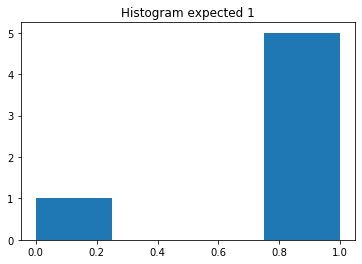

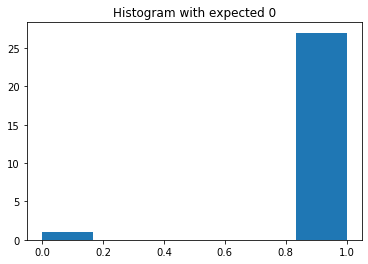

Predicted,0.0,1.0
Actual,,
0.0,1,27
1.0,1,5


In [272]:
# evaluate
x = torch.from_numpy(dNorm.normalize(XEvalData).astype(np.float32))
x = x.to(device)

# evaluate
with torch.no_grad():
    out = model(x)
    
out = out.to('cpu')
out = torch.squeeze((out)) 
npPredicted = out.detach().numpy()
npPredicted[npPredicted>0.5]  = 1
npPredicted[npPredicted<=0.5] = 0

data = {'y_Actual':    list(YEvalData),
        'y_Predicted': list(npPredicted)
        }
print(len(data['y_Actual']), len(data['y_Predicted']))


df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print(df)

_ = plt.hist(npPredicted[YEvalData>0.5], bins='auto')
plt.title("Histogram expected 1")
plt.show()

_ = plt.hist(npPredicted[YEvalData<0.5], bins='auto')
plt.title("Histogram with expected 0")
plt.show()

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
#print (confusion_matrix)
confusion_matrix.style

# STOP Here for now

To start building our own neural network model, we can define a class that inherits PyTorch’s base class (nn.module) for all neural network modules. After doing so, we can start defining some variables and also the layers for our model under the constructor. For this model, we’ll only be using 1 layer of RNN followed by a fully connected layer. The fully connected layer will be in-charge of converting the RNN output to our desired output shape.

We’ll also have to define the forward pass function under forward() as a class method. The order the forward function is sequentially executed, therefore we’ll have to pass the inputs and the zero-initialized hidden state through the RNN layer first, before passing the RNN outputs to the fully-connected layer. Note that we are using the layers that we defined in the constructor.

The last method that we have to define is the method that we called earlier to initialize the hidden state - init_hidden(). This basically creates a tensor of zeros in the shape of our hidden states.

In [51]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        #Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)
         # We'll send the tensor holding the hidden state to the device we specified earlier as well
        return hidden

After defining the model above, we'll have to instantiate the model with the relevant parameters and define our hyperparamters as well. The hyperparameters we're defining below are:

- *n_epochs*: Number of Epochs --> This refers to the number of times our model will go through the entire training dataset
- *lr*: Learning Rate --> This affects the rate at which our model updates the weights in the cells each time backpropogation is done
    - A smaller learning rate means that the model changes the values of the weight with a smaller magnitude
    - A larger learning rate means that the weights are updated to a larger extent for each time step

Similar to other neural networks, we have to define the optimizer and loss function as well. We’ll be using CrossEntropyLoss as the final output is basically a classification task.

In [54]:
if runAllCells:

    #Returns the index of a currently selected device.
    print(f"Currently selected device {torch.cuda.current_device()}")

    print(f"Returns the number of GPUs available {torch.cuda.device_count()}")
    del model
    torch.cuda.empty_cache()


In [55]:
import os
def saveModel(testDes, model, epoch, loss):
    basePath = "C:\\Users\\tzurv\\python\\GoogleCloud\\testOutput"
    dir = os.path.join(basePath, testDes, str(epoch))
    #print(dir)
    if not os.path.exists(dir):
        os.makedirs(dir)   
    fileName = dir+"\\modelNN.pt"
    print(f"saving {fileName}")
    torch.save(model, fileName)
    
    outFile = open(dir+'\\loss.txt', 'w')
    outFile.write(f"{loss}\n")
    outFile.close()

In [ ]:
##### Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=200, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model = model.to(device)

# Define hyperparameters
n_epochs = 4
lr=0.001

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss(ignore_index=char2int[ignoreChar])
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
#print the model
print(model)
modelParameters = sum([param.nelement() for param in model.parameters()])
print('Num Model Parameters ', modelParameters )


Now we can begin our training! As we only have a few sentences, this training process is very fast. However, as we progress, larger datasets and deeper models mean that the input data is much larger and the number of parameters within the model that we have to compute is much more.

In [ ]:

totSentences = input_seq.shape[0]
batchSize = 2000

testDes = "20200805_"+str(n_epochs)+"_"+str(batchSize)+"_"+str(lr)+"_P"+str(modelParameters)

# Training Run
#input_seq = input_seq.to(device)
for epoch in range(1, n_epochs + 1):
    
    totLoss = 0
    batchNo = 0
    for start in range(0, totSentences, batchSize):
    
        # get batch data
        batchNo += 1
        batch_input_seq  = input_seq[start:start+batchSize,  :, :]
        batch_target_seq = target_seq[start:start+batchSize, :   ]
    
        optimizer.zero_grad() # Clears existing gradients from previous epoch

        batch_input_seq = batch_input_seq.to(device)
        output, hidden = model(batch_input_seq)
        output = output.to(device)
        batch_target_seq = batch_target_seq.to(device)

        loss = criterion(output, batch_target_seq.view(-1).long())
        totLoss += loss.item()
        loss.backward() # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly
    
    if epoch%200 == 0:
    #if True:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(totLoss/batchNo))
        if epoch%400 == 0:
            saveModel(testDes, model, epoch, loss.item())

Let’s test our model now and see what kind of output we will get. Before that, let’s define some helper function to convert our model output back to text.

In [27]:
def predict(model, character):
    # One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character = character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    #print(prob)
    
    # Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()
    #print(char_ind)

    return int2char[char_ind], hidden

In [28]:
def sample(model, out_len, start='אני '):
    #print("Eval output")
    model.eval() # eval mode
    start = start.lower()
    # First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        char, h = predict(model, chars)
        chars.append(char)
        
        #print(ii, f"!{char}!")

    return ''.join(chars)

As we can see, the model is able to come up with the sentence ‘good i am fine ‘ if we feed it with the words ‘good’, achieving what we intended for it to do!

In [ ]:

import glob
PATH = "C:\\Users\\tzurv\\python\\GoogleCloud\\testOutput\\" +testDes + "\\"
os.chdir(PATH)

files = glob.glob("*")
prvPredictedOut = ""
for indx in sorted(files, key = int):
    modelFileName = PATH + "\\" + indx + "\\modelNN.pt"
    
    # Model class must be defined somewhere
    model = torch.load(modelFileName)
    model.eval()
    
    predictedOut = sample(model, 50, 'לא ')
    if not predictedOut == prvPredictedOut:
        # get loss
        lossFile = open(PATH + "\\" + indx + "\\loss.txt" , 'rt')
        loss = lossFile.readline().rstrip()
        lossFile.close()
        
        # print information
        print(f"{indx},  loss is {loss}")
        print(f"!{predictedOut}!")
        
        # store last prediction
        prvPredictedOut = predictedOut
    

In [ ]:
import glob
PATH = "C:\\Users\\tzurv\\python\\GoogleCloud\\testOutput\\" +testDes + "\\"
os.chdir(PATH)

files = glob.glob("*")
prvPredictedOut = ""
for indx in sorted(files, key = int):
    modelFileName = PATH + "\\" + indx + "\\modelNN.pt"
    
    # Model class must be defined somewhere
    model = torch.load(modelFileName)
    model.eval()
    
    predictedOut = sample(model, 50, 'תודה רבה, ')
    if not predictedOut == prvPredictedOut:
        # get loss
        lossFile = open(PATH + "\\" + indx + "\\loss.txt" , 'rt')
        loss = lossFile.readline().rstrip()
        lossFile.close()
        
        # print information
        print(f"{indx},  loss is {loss}")
        print(f"!{predictedOut}!")
        
        # store last prediction
        prvPredictedOut = predictedOut

In [ ]:
sample(model, 50, 'לא ')
